# Physics 4B: Constitutive Law P12 with prior

In [16]:
from constitutive_laws_generator import LinearElasticConstitutiveLaw, NeoHookeanConstitutiveLaw
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from sympy import *
from kan import *
from kan.compiler import kanpiler

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)
torch.set_default_dtype(torch.float64)

N = 1000
sigma = 0.2 # previously sigma = 0.2

F = torch.eye(3,3)[None,:,:].expand(N,3,3) + (torch.rand(N,3,3)*2-1)*sigma
det = torch.det(F)
F *= (det > 0)[:,None,None]

linear = LinearElasticConstitutiveLaw(young_modulus=1.0, poisson_ratio=0.2)
P_l = linear(F)
P11_l = P_l[:,[0],[0]]
P12_l = P_l[:,[0],[1]]

neo = NeoHookeanConstitutiveLaw(young_modulus=1.0, poisson_ratio=0.2)
P_n = neo(F)
P11_n = P_n[:,[0],[0]]
P12_n = P_n[:,[0],[1]]

# P11
# linear: P11 = 2 * mu * (F11 - 1) + lambda * (F11 + F22 + F33 - 3)
# neohookean: P11 = mu * (F11^2 + F21^2 + F31^2 - 1) + lambda * log(|F|)

# P12
# linear: P12 = mu * (F12 + F21)
# neohookean: P12 = mu * (F12 * F11 + F22 * F21 + F32 * F31)

saving model version 0.1


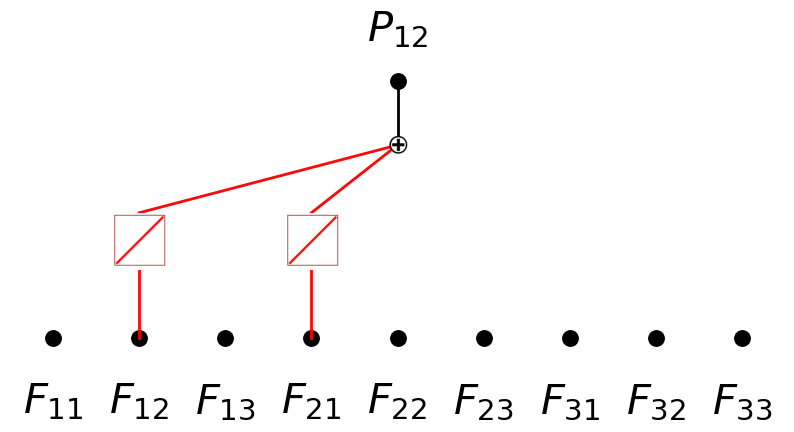

In [17]:
mu, lambda_ = linear.get_lame_parameters()
input_vars = F11, F12, F13, F21, F22, F23, F31, F32, F33 = symbols('F11 F12 F13 F21 F22 F23 F31 F32 F33')

# compile more terms in ground truth
# or make the network bigger
P12_l_expr = mu * (F12 + F21)
model = kanpiler(input_vars, P12_l_expr, base_fun='identity')

F_flatten = F.reshape(N, -1)

model.get_act(F_flatten)
model.plot(in_vars=input_vars, out_vars=[r'$P_{12}$'], varscale=0.75, scale=1.0, out_vars_offset=0.08)

saving model version 0.2


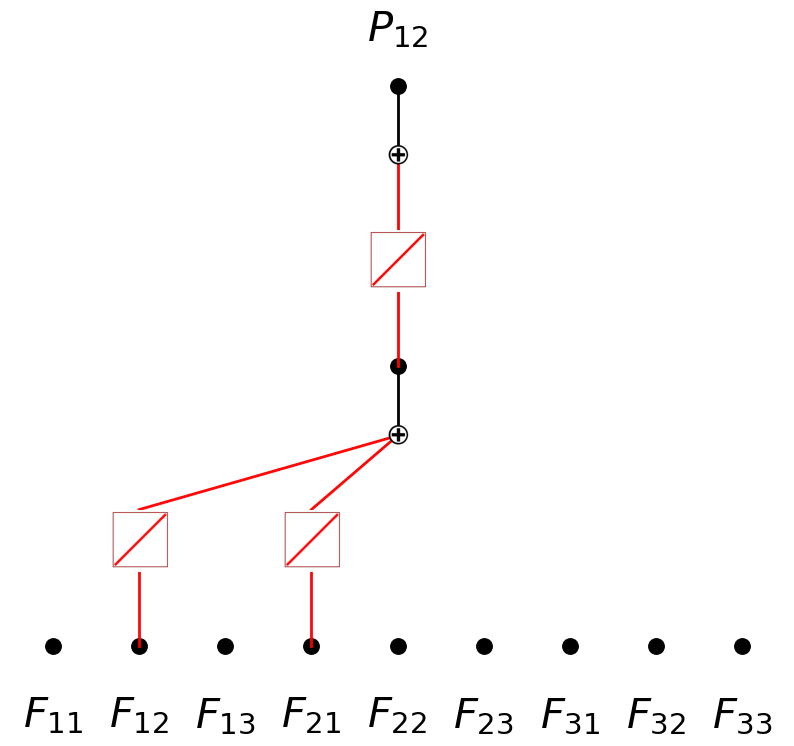

In [18]:
model.expand_depth()
model.plot(in_vars=input_vars, out_vars=[r'$P_{12}$'], varscale=0.75, scale=1.0, out_vars_offset=0.08)

saving model version 0.3
saving model version 0.4


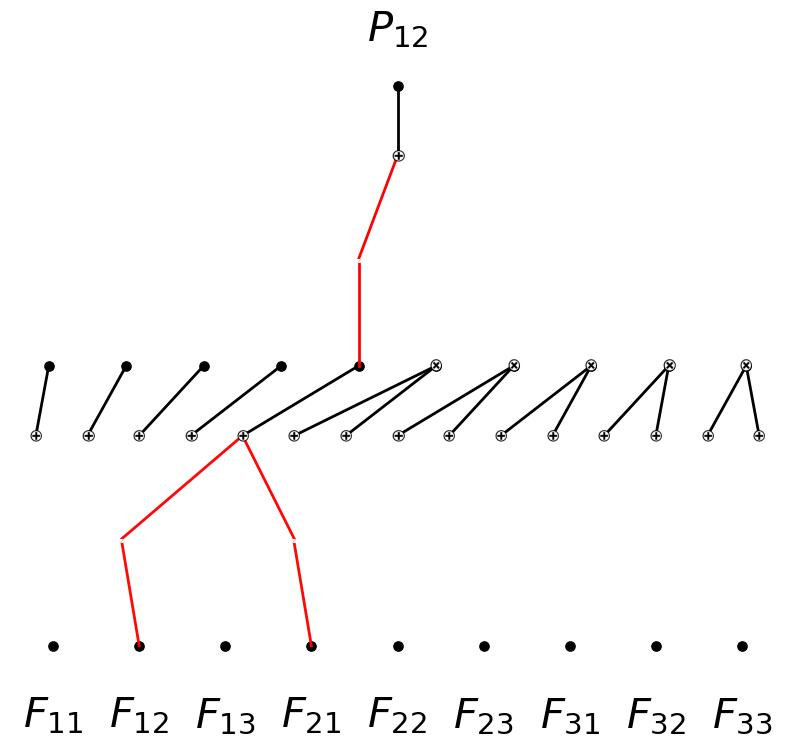

In [19]:
model.expand_width(1,5,sum_bool=False,mult_arity=2)
model.expand_width(1,4)
model.plot(in_vars=input_vars, out_vars=[r'$P_{12}$'], varscale=0.75, scale=1.0, out_vars_offset=0.08)

In [20]:
model.perturb(mode='all')

saving model version 0.5


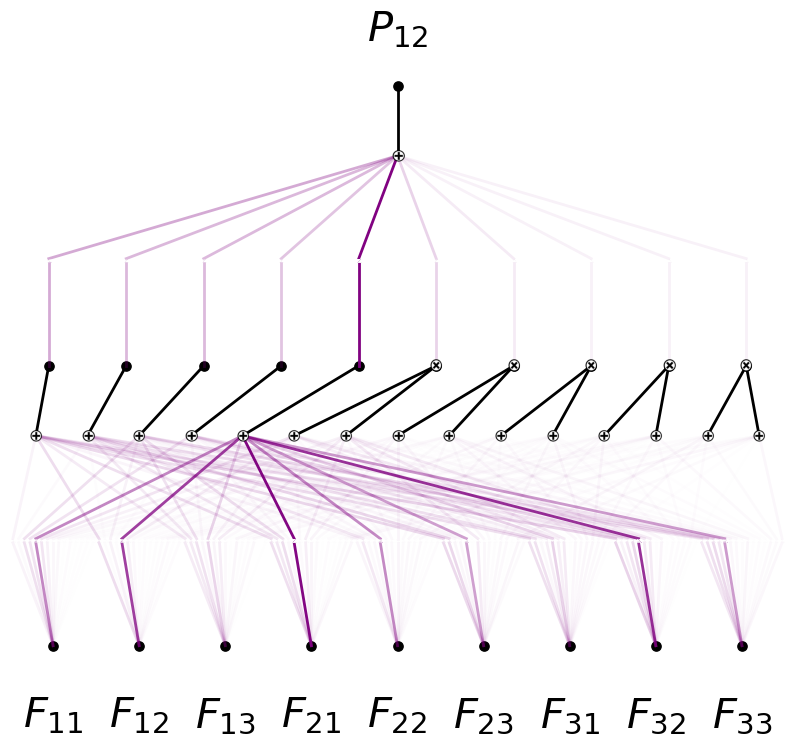

In [21]:
model.plot(in_vars=input_vars, out_vars=[r'$P_{12}$'], varscale=0.75, scale=1.0, out_vars_offset=0.08)

In [22]:
dataset = create_dataset_from_data(F_flatten, P12_n)
torch.sqrt(torch.mean((model(dataset['train_input']) - dataset['train_label'])**2))

tensor(0.2937, grad_fn=<SqrtBackward0>)

In [23]:
from kan.utils import create_dataset_from_data

#dataset = create_dataset_from_data(F_flatten, P12_n)
model.fit(dataset, steps=100, lamb=1e-5);

| train_loss: 2.00e-03 | test_loss: 1.51e-03 | reg: 4.69e+00 | : 100%|█| 100/100 [02:47<00:00,  1.67

saving model version 0.6


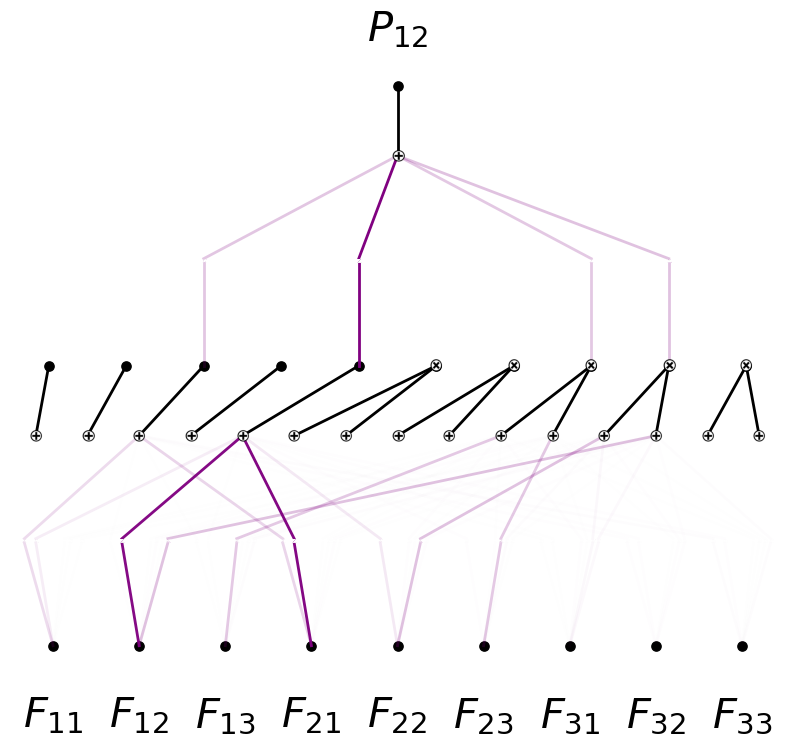

In [24]:
model.plot(in_vars=input_vars, out_vars=[r'$P_{12}$'], varscale=0.75, scale=1.0, out_vars_offset=0.08)

saving model version 0.7


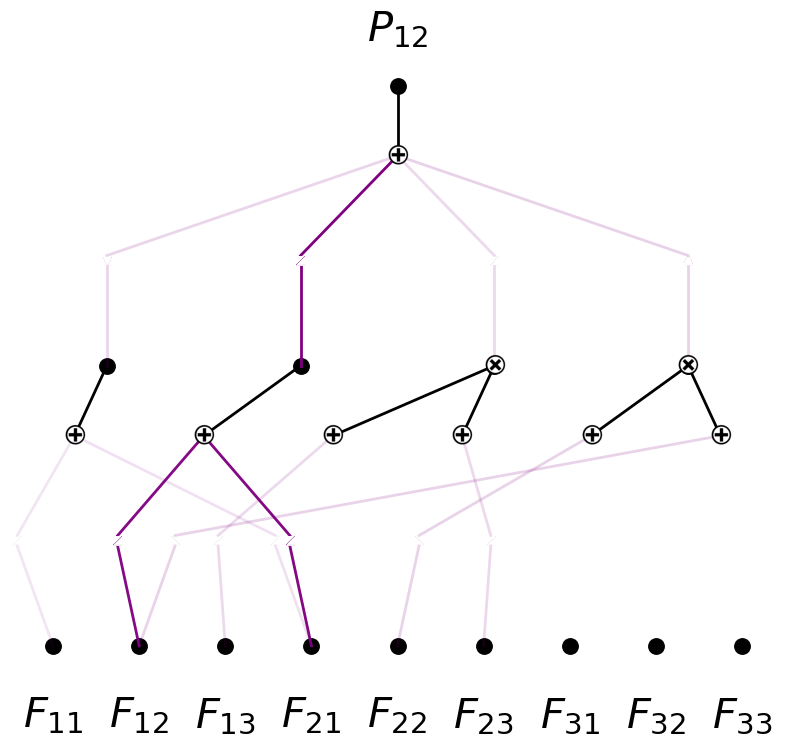

In [25]:
model = model.prune()
model.plot(in_vars=input_vars, out_vars=[r'$P_{12}$'], varscale=0.75, scale=1.0, out_vars_offset=0.08)

In [27]:
model = model.rewind('0.7')

rewind to model version 0.7, renamed as 1.7


In [28]:
model.fit(dataset, steps=100);

| train_loss: 2.92e-04 | test_loss: 3.67e-04 | reg: 6.50e+00 | : 100%|█| 100/100 [01:23<00:00,  1.20

saving model version 1.8


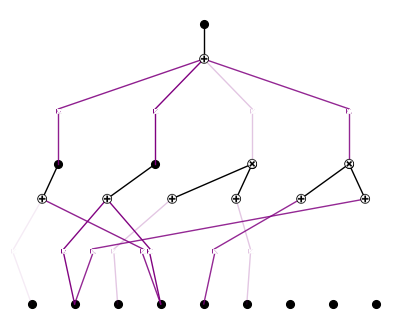

In [29]:
model.plot()


In [30]:
model = model.prune()
model.auto_symbolic()

saving model version 1.9
fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,0,2) with 0
fixing (0,0,3) with 0
fixing (0,0,4) with 0
fixing (0,0,5) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with x^2, r2=0.9983181760968648, c=2
fixing (0,1,2) with 0
fixing (0,1,3) with 0
fixing (0,1,4) with 0
fixing (0,1,5) with sin, r2=0.9991134619027429, c=2
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with x, r2=0.9992434434738733, c=1
fixing (0,2,3) with 0
fixing (0,2,4) with 0
fixing (0,2,5) with 0
fixing (0,3,0) with x, r2=0.9973857325647751, c=1
fixing (0,3,1) with x^2, r2=0.9969197588869652, c=2
fixing (0,3,2) with 0
fixing (0,3,3) with 0
fixing (0,3,4) with 0
fixing (0,3,5) with 0
fixing (0,4,0) with 0
fixing (0,4,1) with 0
fixing (0,4,2) with 0
fixing (0,4,3) with 0
fixing (0,4,4) with x, r2=0.9997375051819277, c=1
fixing (0,4,5) with 0
fixing (0,5,0) with 0
fixing (0,5,1) with 0
fixing (0,5,2) with 0
fixing (0,5,3) with x, r2=0.9991375860233465, c=1
fixing (0,5,4) with 0
fix

In [31]:
model.fit(dataset, steps=100);

| train_loss: 7.36e-03 | test_loss: 7.64e-03 | reg: 0.00e+00 | : 100%|█| 100/100 [01:31<00:00,  1.09

saving model version 1.11


In [39]:
from kan.utils import ex_round
ex_round(expand(ex_round(model.symbolic_formula(var=input_vars)[0][0],4)),2)

0.02*F12**2 + 0.42*F12 + 0.44*F13*F23 - 0.03*F21**2 + 0.42*F21